# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [543]:
import pandas as pd

In [544]:
# Read in the customer data
customers = pd.read_csv('../Data/maven_music_customers.csv')

In [545]:
# Read in the listening history
listening_hist = pd.read_excel('../Data/maven_music_listening_history.xlsx')

In [546]:
# Hint: Where might you find listening history data beyond the ID's?


In [547]:
# Read in the audio data
audio = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=1)

In [548]:
# Read in the session data
session = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=2)

In [549]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [550]:
listening_hist.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [551]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [552]:
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [553]:
# Check the data types
# check data type of customer
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [554]:
#member since -- datetime, subscription rate -- numeric, discount -- numeric, cancellation date -- dateeime
customers["Member Since"] = pd.to_datetime(customers["Member Since"])
customers["Subscription Rate"] = pd.to_numeric(customers["Subscription Rate"].str.replace("$", ""))
customers["Cancellation Date"] = pd.to_datetime(customers["Cancellation Date"])

C:\Users\harshs\AppData\Local\Temp\ipykernel_64728\2448803970.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customers["Subscription Rate"] = pd.to_numeric(customers["Subscription Rate"].str.replace("$", ""))


In [555]:
listening_hist.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [556]:
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [557]:
# Look for NaN values in the data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [558]:
# subscription plan -- 5 null, discount -- 23 null, cancellation date -- 17 null

In [559]:
customers['Subscription Plan'].value_counts(dropna = False)

Premium (No Ads)    13
Basic (Ads)         12
NaN                  5
Name: Subscription Plan, dtype: int64

In [560]:
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [561]:
# subscription Plan should be dependent on subscription rate, since all NaN has rate of 2.99 we can impute value of corresponding plan
# check plan for rate of 2.99
customers[customers['Subscription Rate'] == 2.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT
10,5826,Chord Hayes,Email: harmonic.chord@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT
13,6092,Benny Beat,Email: rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,NaN,2023-06-01


In [562]:
# imputing Basic (ADS) in NaN
customers['Subscription Plan'] =  np.where(customers['Subscription Rate'] == 2.99 , "Basic (ADS)", customers['Subscription Plan'])

In [563]:
customers['Discount?'].value_counts()

Yes    7
Name: Discount?, dtype: int64

In [564]:
# replacing nan with No
customers['Discount?'] = customers['Discount?'].fillna("No")

In [565]:
customers["Cancellation Date"].value_counts()

2023-06-01    6
2023-06-02    5
2023-06-03    2
Name: Cancellation Date, dtype: int64

In [566]:
listening_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [567]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [568]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


#### ii. Inconsistent Text & Typos

In [569]:
# Look for inconsistent text & typos
customers['Email'] = customers['Email'].str.replace("Email: ", "")

#### iii. Duplicate Rows

In [570]:
# Look for duplicate rows
customers[customers.duplicated(keep=False)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [571]:
listening_hist[listening_hist.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [572]:
session[session.duplicated()]

,Session ID,Session Log In Time


In [573]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


#### iv. Outliers

In [574]:
# Look for outliers
import seaborn as sns

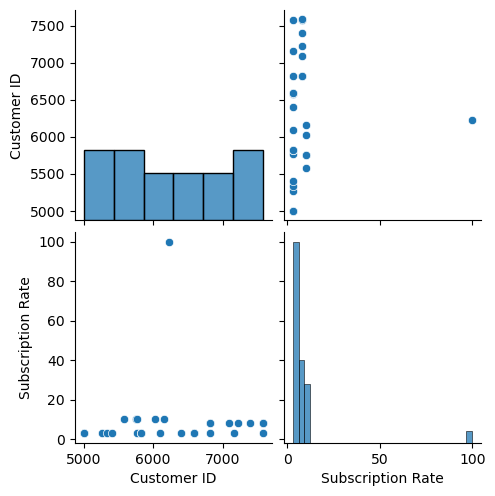

In [575]:
sns.pairplot(customers)

<Axes: xlabel='Subscription Rate'>

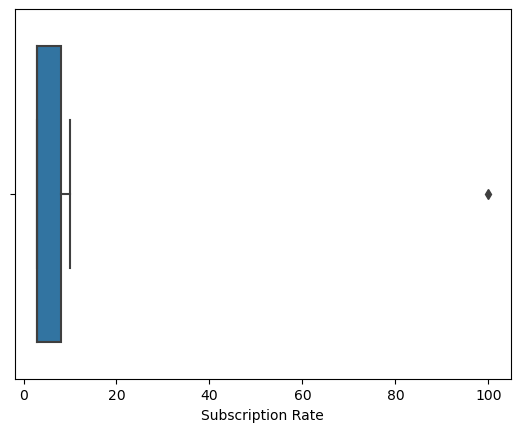

In [576]:
# can see a possible outlier in subscription rate
sns.boxplot(x = customers["Subscription Rate"])

In [577]:
mean = np.mean(customers["Subscription Rate"])
sd = np.std(customers["Subscription Rate"])
min_val = mean - 3 * sd
max_val = mean + 3 * sd
min_val, max_val

(-43.11353751330536, 60.226870846638704)

In [578]:
mask = (customers["Subscription Rate"] < min_val) | (customers["Subscription Rate"] > max_val)
customers[mask]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,No,2023-06-02


In [579]:
# cplan and rate should be realted so looking rate for subscription plan of Premium (No Ads)
customers[customers["Subscription Plan"] == "Premium (No Ads)"]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaT
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaT
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,No,2023-06-02
14,6163,Melody Parks,park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,No,NaT
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,No,2023-06-02
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,Yes,NaT
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01


In [580]:
# rate for subscription plan Premium (No Ads) is 9.99 or 7.99 so manipulating the value
customers.iloc[15, 5] = 9.99

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [581]:
# Create a 'Cancelled' column
customers["Cancelled"] = np.where(customers["Cancellation Date"].isna(), 0, 1)

In [582]:
customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (ADS),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (ADS),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (ADS),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (ADS),2.99,No,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (ADS),2.99,No,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (ADS),2.99,No,NaT,0


In [583]:
# Create an updated 'Email' column without the Email: portion


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [584]:
# How long were customers members before they cancelled?
customers_cancelled = customers[customers["Cancelled"] == 1]
customers_cancelled_days = (customers_cancelled["Cancellation Date"] - customers_cancelled["Member Since"]).dt.days.rename("Memership Days")
print("Average Membership days of cancelled member", customers_cancelled_days.mean())

Average Membership days of cancelled member 46.30769230769231


In [631]:
customers_cancelled

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (ADS),2.99,No,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (ADS),2.99,No,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,No,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (ADS),2.99,No,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,No,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (ADS),2.99,No,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01,1


In [585]:
customers_cancelled_days

2     80
5     75
7     72
12    65
13    61
15    57
19    46
22    32
23    32
25    24
26    24
28    18
29    16
Name: Memership Days, dtype: int64

<Axes: xlabel='Cancelled'>

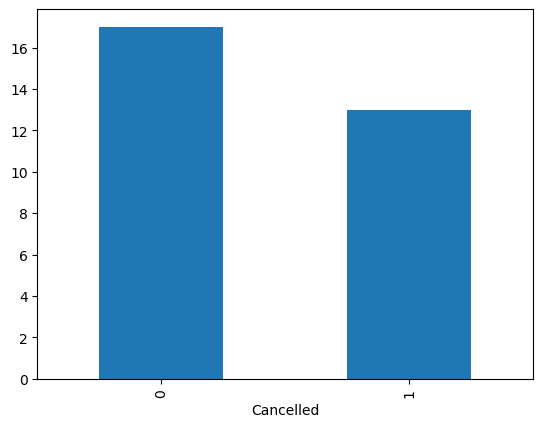

In [586]:
customers.groupby("Cancelled")['Customer ID'].count().plot.bar()

In [587]:
# 
customers_cancelled.groupby("Discount?")['Customer ID'].count()

Discount?
No     7
Yes    6
Name: Customer ID, dtype: int64

<Axes: xlabel='Discount?'>

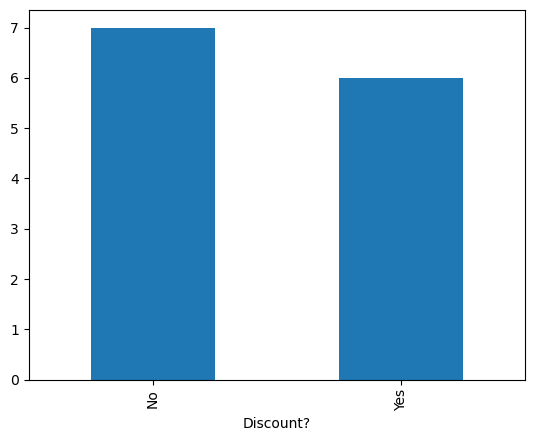

In [588]:
# Cancellation rate for those who had a discount
customers_cancelled.groupby("Discount?")['Customer ID'].count().plot.bar()

In [589]:
# cancelled Count by subscription plan
customers_cancelled.groupby(["Subscription Plan"])["Customer ID"].count()

Subscription Plan
Basic (ADS)         4
Premium (No Ads)    9
Name: Customer ID, dtype: int64

<Axes: xlabel='Subscription Plan'>

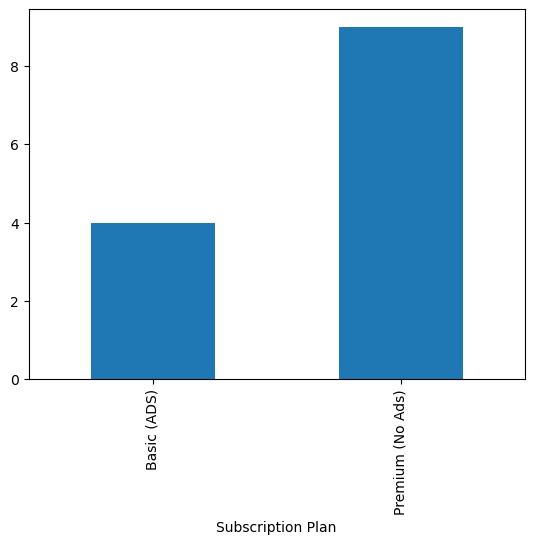

In [590]:
customers_cancelled.groupby(["Subscription Plan"])["Customer ID"].count().plot.bar()

In [591]:
customers.groupby("Subscription Plan")["Customer ID"].count()

Subscription Plan
Basic (ADS)         17
Premium (No Ads)    13
Name: Customer ID, dtype: int64

In [592]:
# number of customers joined in month
customers["Member Since"].dt.month.value_counts()

3    13
5     9
4     8
Name: Member Since, dtype: int64

In [593]:
# number of education staff customers
len(customers[customers["Email"].str.contains('edu')])

6

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [594]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (ADS),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (ADS),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (ADS),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (ADS),2.99,No,NaT,0


In [595]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [596]:
listening_hist.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [597]:
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [598]:
# Split the ID in the audio data so the column can be joined with other tables
audio["ID"] = audio["ID"].str.replace("Song-", "")
audio["ID"] = audio["ID"].str.replace("Podcast-", "")

In [599]:
# Hint: Check the data type of Audio ID in the audio table
audio["ID"] = pd.to_numeric(audio["ID"])

In [600]:
# The number of listening sessions that each customer had in the past 3 months
listening_hist.groupby("Customer ID")["Audio Order"].count()

Customer ID
5001    60
5002    22
5004     9
5267    45
5338    18
5404     8
5581     5
5759    15
5761     5
5763    31
5826    17
5827     7
6029    12
6092    10
6163     4
6229    13
6406     9
6584    27
6586    22
6588    10
6821    21
6822    15
6824    31
7087    11
7158    13
7224    29
7401    11
7579     9
7581    14
7583     2
Name: Audio Order, dtype: int64

In [601]:
# The most popular genres that customers listened to
audio[audio["Popularity"] == audio["Popularity"].max()]

,ID,Name,Genre,Popularity
11,112,Midnight Blues,Jazz,80


<Axes: >

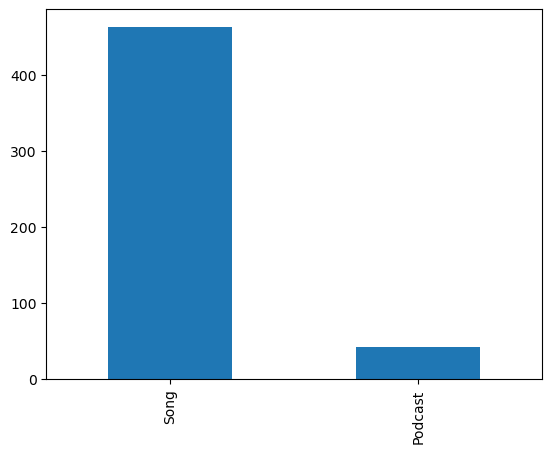

In [602]:
listening_hist["Audio Type"].value_counts().plot.bar()

In [603]:
audio_listening_hist = listening_hist.merge(audio, how="left", left_on="Audio ID", right_on="ID")
audio_listening_hist.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,105,Pop Rocks,Pop Music,52


In [604]:
# how many time each audio type was listened
audio_listening_hist.groupby("Audio Type").size()

Audio Type
Podcast     42
Song       463
dtype: int64

In [605]:
# how many time each genre was listened
audio_listening_hist.groupby("Genre").size()

Genre
Comedy         19
Country        68
Hip Hop        88
Jazz           48
Pop           100
Pop Music     167
True Crime     15
dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [606]:
# Create a dataframe ready for modeling
semi_table = audio_listening_hist.merge(session)

In [607]:
final_table = customers.merge(semi_table)

In [608]:
final_table.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Session Log In Time
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,1,101,Song,101,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,2,102,Song,102,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,3,103,Song,103,Sunset Boulevard,Pop Music,5,2023-03-13 18:29:00
3,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,4,104,Song,104,Glowing Hearts,Pop Music,10,2023-03-13 18:29:00
4,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,5,105,Song,105,Pop Rocks,Pop Music,52,2023-03-13 18:29:00


In [609]:
# Calculate the number of listening sessions for each customer
customer_listening = final_table.groupby("Customer ID")["Session ID"].nunique()

In [610]:
# Percent pop
(len(final_table[final_table.Genre == "Pop"]) / len(final_table[final_table.Genre.notna()]))* 100 

19.801980198019802

In [611]:
# Percent podcasts


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

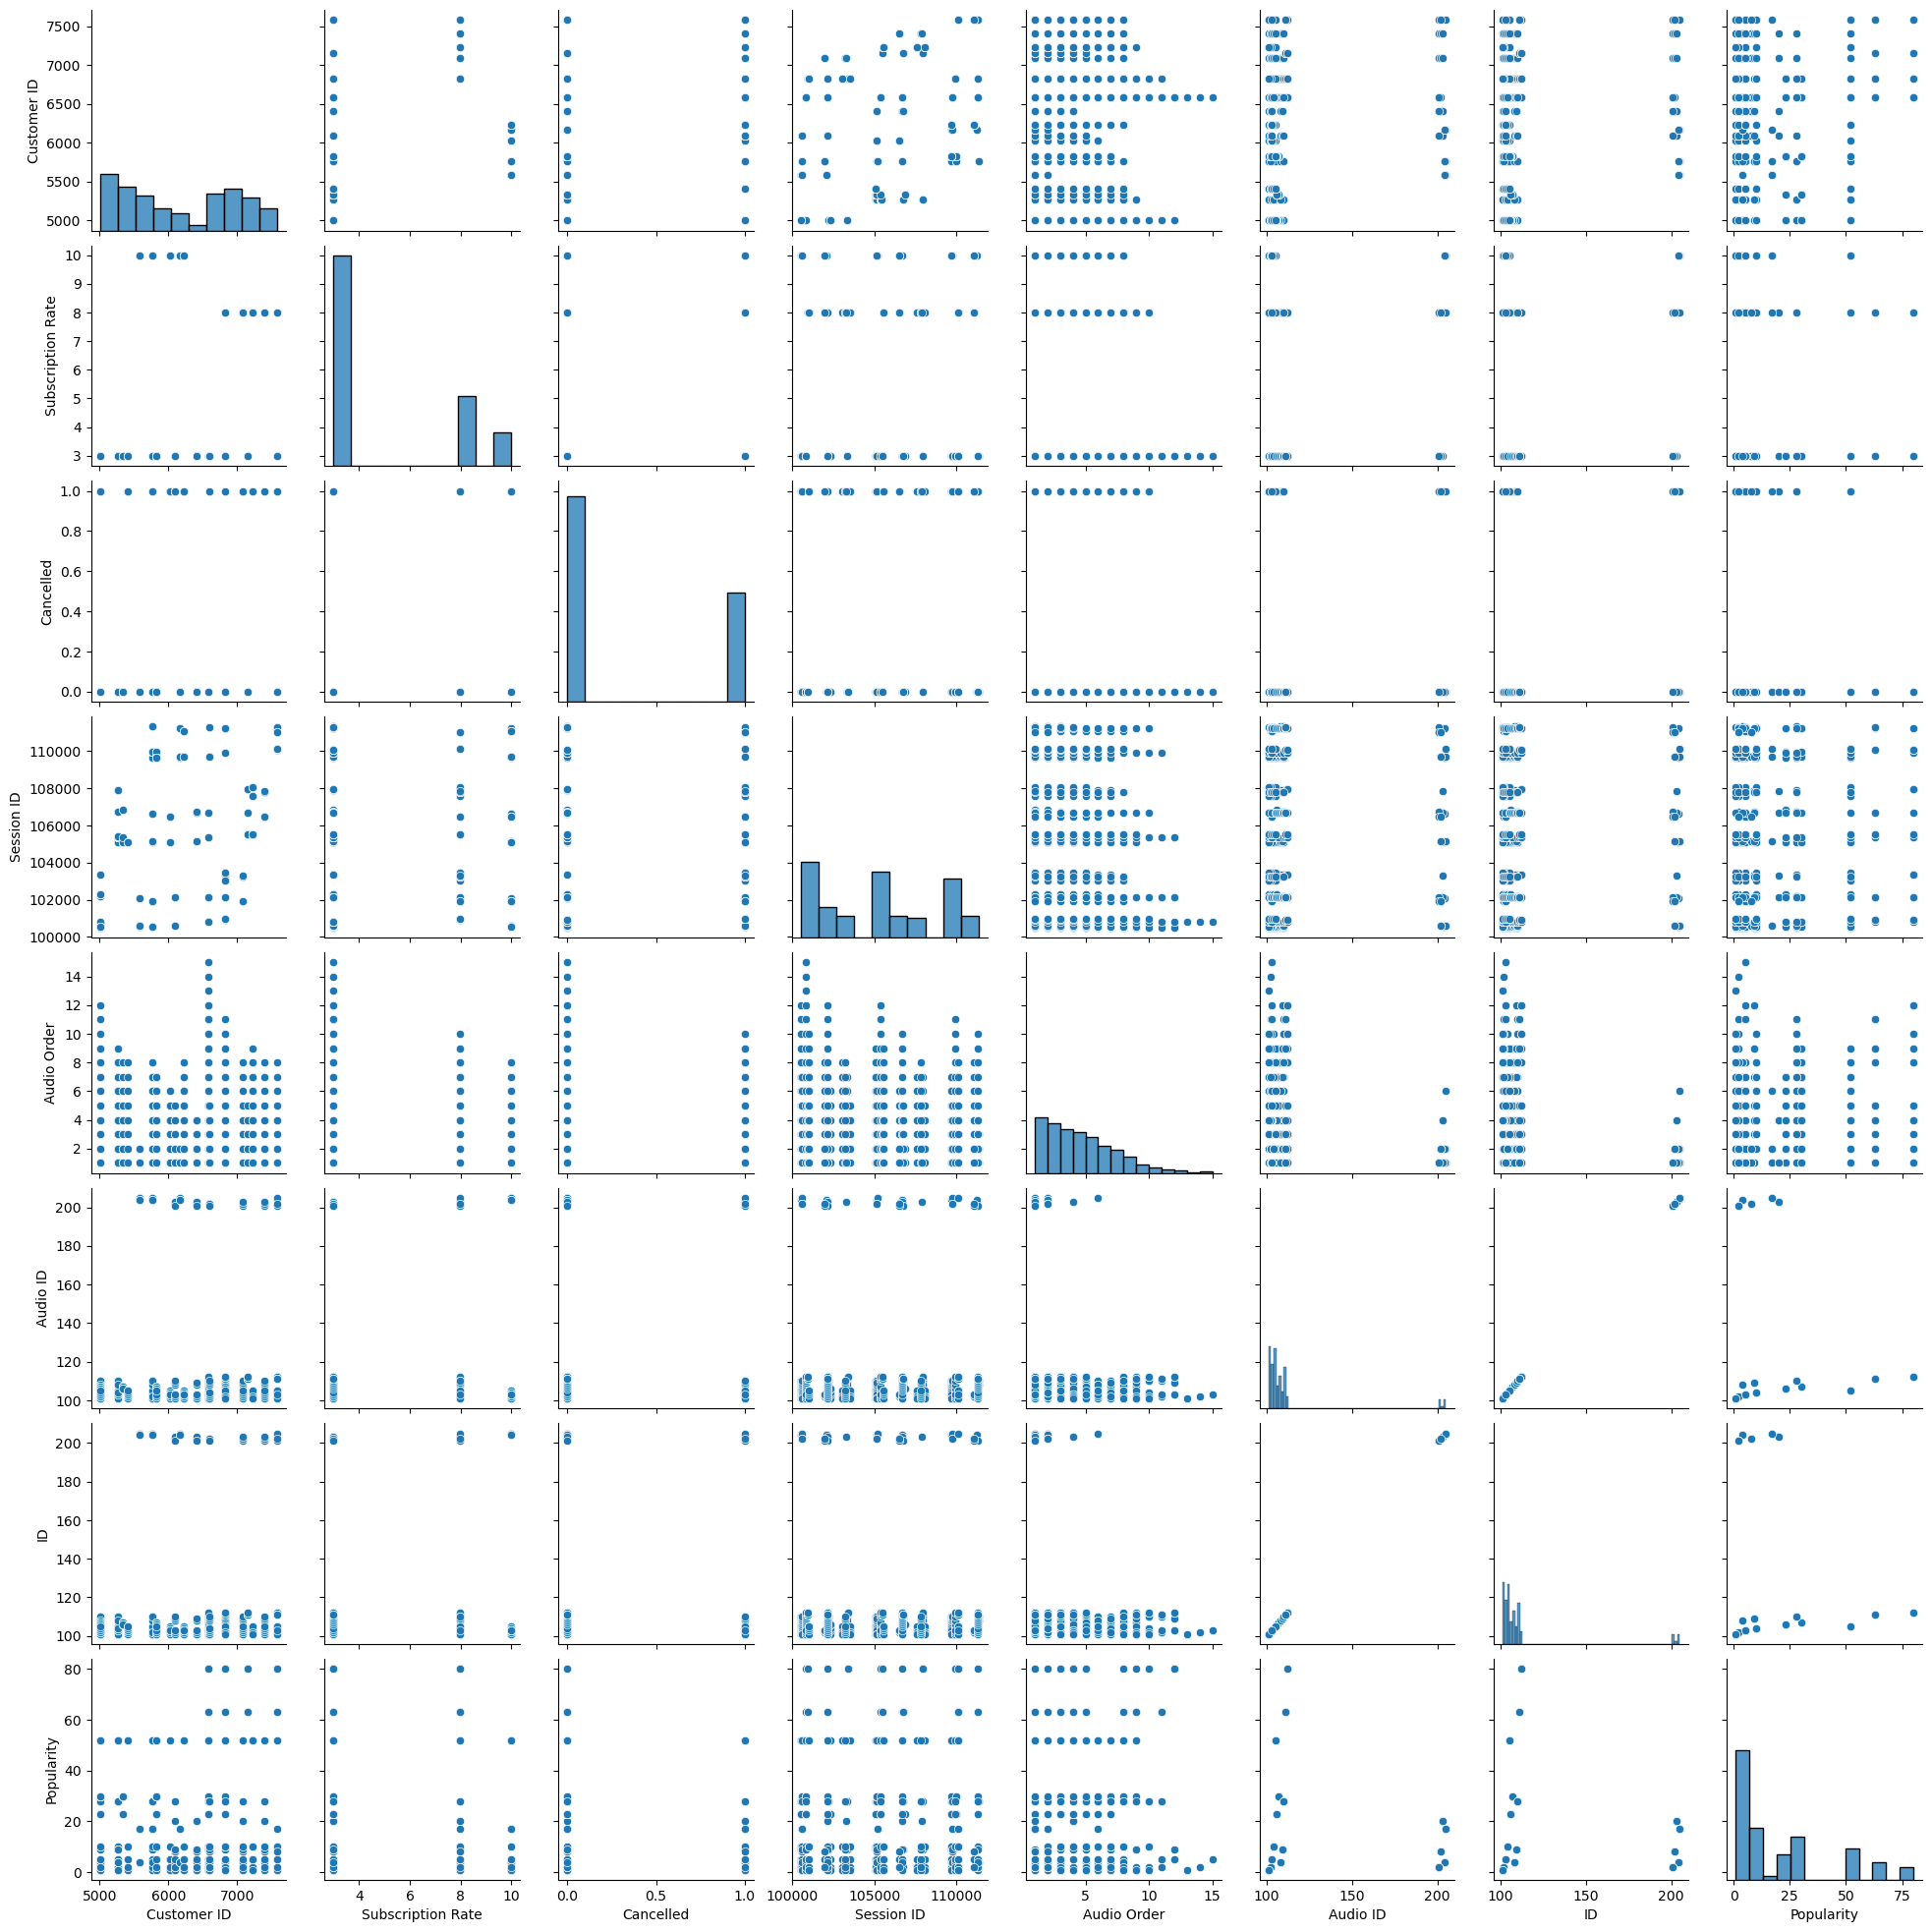

In [612]:
sns.pairplot(final_table)

In [613]:
final_table.corr()

C:\Users\harshs\AppData\Local\Temp\ipykernel_64728\164737582.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_table.corr()


,Customer ID,Subscription Rate,Cancelled,Session ID,Audio Order,Audio ID,ID,Popularity
Customer ID,1.000000,0.442400,0.434325,0.378586,0.016992,0.089991,0.089991,0.182633
Subscription Rate,0.442400,1.000000,0.680446,-0.003440,-0.113903,0.195619,0.195619,-0.129340
Cancelled,0.434325,0.680446,1.000000,0.002264,-0.044100,0.010453,0.010453,-0.266578
Session ID,0.378586,-0.003440,0.002264,1.000000,-0.145404,0.043837,0.043837,0.018842
Audio Order,0.016992,-0.113903,-0.044100,-0.145404,1.000000,-0.239904,-0.239904,0.052303
Audio ID,0.089991,0.195619,0.010453,0.043837,-0.239904,1.000000,1.000000,-0.051972
ID,0.089991,0.195619,0.010453,0.043837,-0.239904,1.000000,1.000000,-0.051972
Popularity,0.182633,-0.129340,-0.266578,0.018842,0.052303,-0.051972,-0.051972,1.000000


In [614]:
final_table

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Session Log In Time
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,1,101,Song,101,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,2,102,Song,102,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,3,103,Song,103,Sunset Boulevard,Pop Music,5,2023-03-13 18:29:00
3,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,4,104,Song,104,Glowing Hearts,Pop Music,10,2023-03-13 18:29:00
4,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,5,105,Song,105,Pop Rocks,Pop Music,52,2023-03-13 18:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03,1,110113,4,101,Song,101,Dance All Night,Pop,1,2023-05-16 19:50:00
501,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03,1,110113,5,103,Song,103,Sunset Boulevard,Pop Music,5,2023-05-16 19:50:00
502,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03,1,110113,6,205,Podcast,205,Investigating Darkness,True Crime,17,2023-05-16 19:50:00
503,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-01,1,111057,1,201,Podcast,201,Jokes on Jokes,Comedy,2,2023-05-17 00:35:00


In [615]:
customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (ADS),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (ADS),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (ADS),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (ADS),2.99,No,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (ADS),2.99,No,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (ADS),2.99,No,NaT,0


In [616]:
genres = pd.get_dummies(audio_listening_hist.Genre)
customer_genre = pd.concat([audio_listening_hist["Customer ID"], genres], axis=1)
customer_genre = customer_genre.groupby("Customer ID").sum()
genre_rate = customer_genre.merge(customers[["Customer ID", "Subscription Rate"]], how="left", on="Customer ID")

In [624]:
customers["Discount"] = np.where(customers["Discount?"] == "No", 0 , 1)

In [627]:
genre_rate_discount = genre_rate.merge(customers[["Customer ID", "Discount"]], how="left")

In [629]:
genre_rate_discount_listening = genre_rate_discount.merge(customer_listening, how="left", on="Customer ID")

In [630]:
genre_rate_discount_listening

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime,Subscription Rate,Discount,Session ID
0,5001,0,0,26,0,12,22,0,2.99,0,8
1,5002,0,22,0,0,0,0,0,2.99,0,4
2,5004,0,0,0,0,3,6,0,2.99,0,1
3,5267,0,0,22,0,7,16,0,2.99,0,7
4,5338,0,18,0,0,0,0,0,2.99,0,4
5,5404,0,0,0,0,2,6,0,2.99,0,1
6,5581,0,0,0,0,0,0,5,9.99,0,3
7,5759,0,0,0,0,5,10,0,9.99,0,2
8,5761,0,0,0,0,0,0,5,9.99,0,3
9,5763,0,0,11,0,8,12,0,2.99,0,6


In [617]:
final_table

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Session Log In Time
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,1,101,Song,101,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,2,102,Song,102,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,3,103,Song,103,Sunset Boulevard,Pop Music,5,2023-03-13 18:29:00
3,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,4,104,Song,104,Glowing Hearts,Pop Music,10,2023-03-13 18:29:00
4,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,100520,5,105,Song,105,Pop Rocks,Pop Music,52,2023-03-13 18:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03,1,110113,4,101,Song,101,Dance All Night,Pop,1,2023-05-16 19:50:00
501,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03,1,110113,5,103,Song,103,Sunset Boulevard,Pop Music,5,2023-05-16 19:50:00
502,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03,1,110113,6,205,Podcast,205,Investigating Darkness,True Crime,17,2023-05-16 19:50:00
503,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-01,1,111057,1,201,Podcast,201,Jokes on Jokes,Comedy,2,2023-05-17 00:35:00


In [626]:
customer_listening

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [632]:
customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Discount
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (ADS),2.99,No,NaT,0,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (ADS),2.99,No,NaT,0,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (ADS),2.99,No,2023-06-01,1,0
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (ADS),2.99,No,NaT,0,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (ADS),2.99,No,NaT,0,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (ADS),2.99,No,2023-06-03,1,0
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaT,0,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1,0
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaT,0,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (ADS),2.99,No,NaT,0,0


In [637]:
customers_cancelled["Cancelled Days"] = (customers_cancelled["Cancellation Date"] - customers_cancelled["Member Since"]).dt.days.rename("Memership Days")

C:\Users\harshs\AppData\Local\Temp\ipykernel_64728\2992908074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_cancelled["Cancelled Days"] = (customers_cancelled["Cancellation Date"] - customers_cancelled["Member Since"]).dt.days.rename("Memership Days")


In [638]:
customers_cancelled

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Cancelled Days
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (ADS),2.99,No,2023-06-01,1,80
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (ADS),2.99,No,2023-06-03,1,75
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1,72
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,No,2023-06-02,1,65
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (ADS),2.99,No,2023-06-01,1,61
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,No,2023-06-02,1,57
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (ADS),2.99,No,2023-06-01,1,46
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1,32
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1,32
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01,1,24


In [641]:
final_model = genre_rate_discount_listening.merge(customers_cancelled[["Customer ID", "Cancelled Days"]], how="left").fillna(365)

In [645]:
x = final_model.drop(["Customer ID"], axis=1)

In [646]:
x

,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime,Subscription Rate,Discount,Session ID,Cancelled Days
0,0,0,26,0,12,22,0,2.99,0,8,365.0
1,0,22,0,0,0,0,0,2.99,0,4,365.0
2,0,0,0,0,3,6,0,2.99,0,1,80.0
3,0,0,22,0,7,16,0,2.99,0,7,365.0
4,0,18,0,0,0,0,0,2.99,0,4,365.0
5,0,0,0,0,2,6,0,2.99,0,1,75.0
6,0,0,0,0,0,0,5,9.99,0,3,365.0
7,0,0,0,0,5,10,0,9.99,0,2,72.0
8,0,0,0,0,0,0,5,9.99,0,3,365.0
9,0,0,11,0,8,12,0,2.99,0,6,365.0


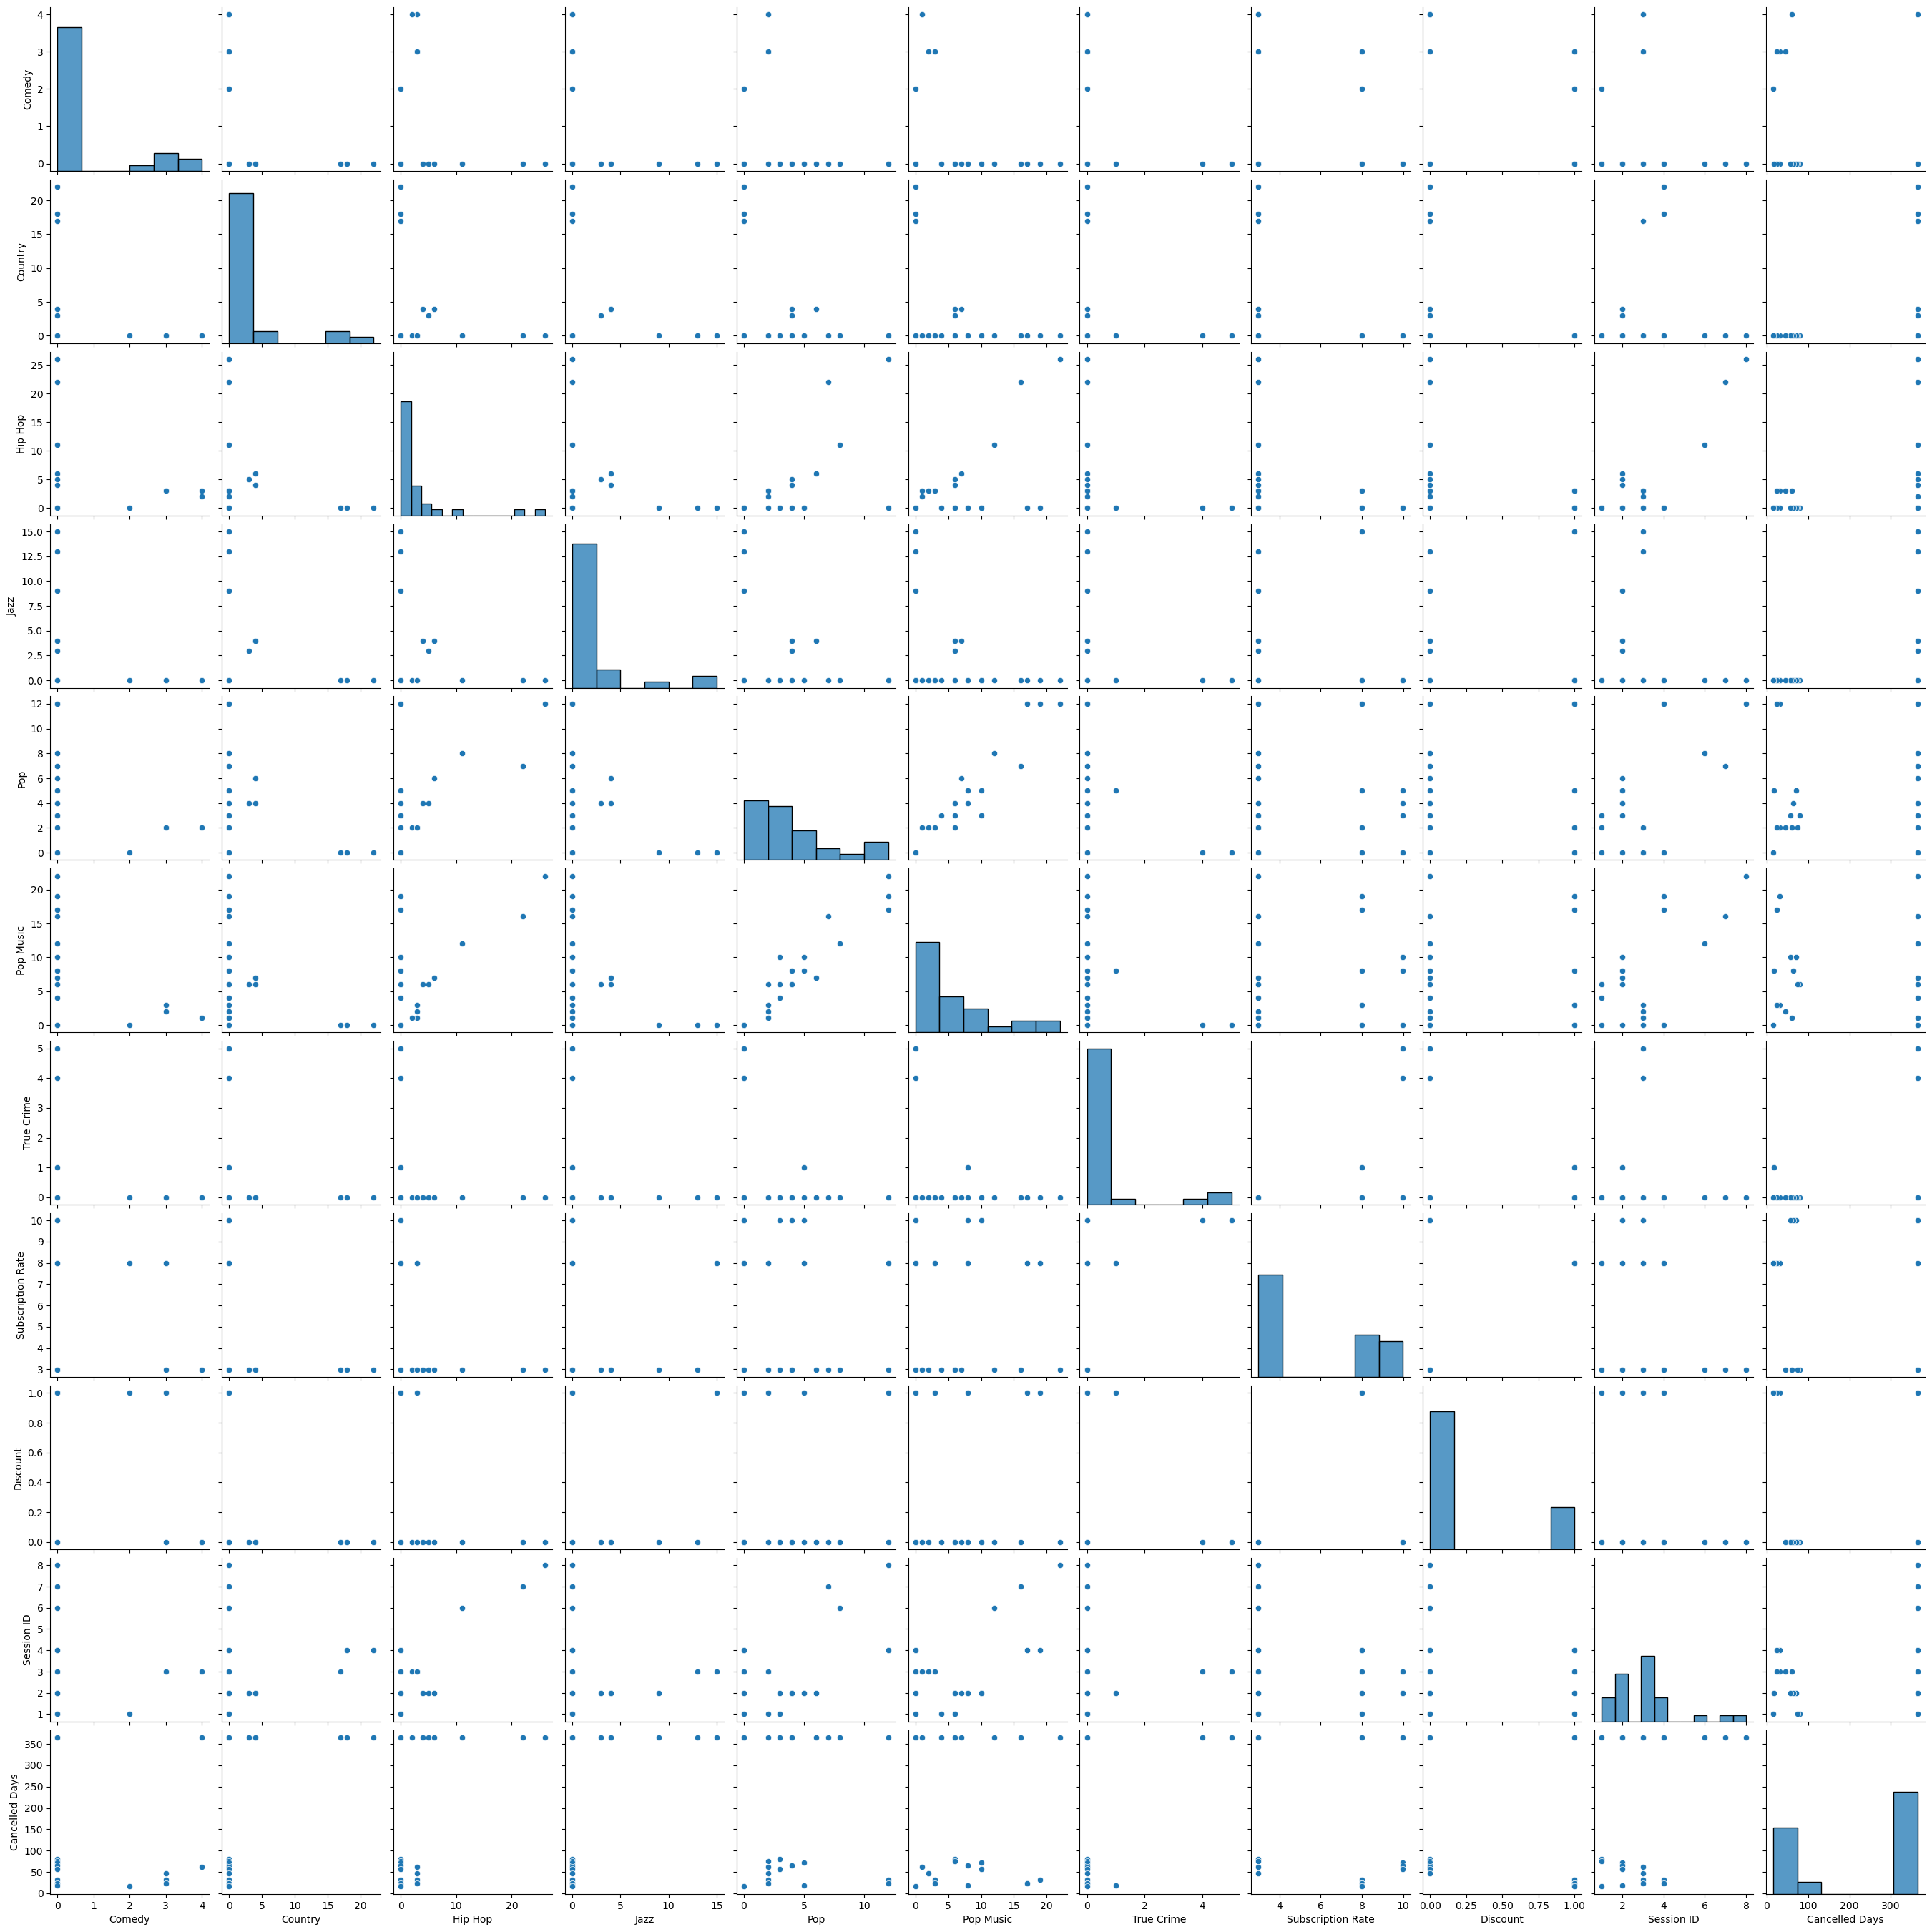

In [647]:
sns.pairplot(x)

In [648]:
x.corr()

,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime,Subscription Rate,Discount,Session ID,Cancelled Days
Comedy,1.000000,-0.192322,-0.036233,-0.203189,-0.206303,-0.302681,-0.172513,-0.074544,0.215659,-0.063441,-0.365887
Country,-0.192322,1.000000,-0.136418,-0.103141,-0.279595,-0.288139,-0.140525,-0.337779,-0.218356,0.104685,0.344644
Hip Hop,-0.036233,-0.136418,1.000000,-0.121263,0.536372,0.599658,-0.168953,-0.352172,-0.185817,0.791476,0.281698
Jazz,-0.203189,-0.103141,-0.121263,1.000000,-0.258750,-0.275641,-0.148464,-0.139617,0.078271,-0.108057,0.364117
Pop,-0.206303,-0.279595,0.536372,-0.258750,1.000000,0.957986,-0.292915,-0.023368,0.209513,0.505976,-0.209870
Pop Music,-0.302681,-0.288139,0.599658,-0.275641,0.957986,1.000000,-0.286719,0.030882,0.139516,0.527374,-0.224628
True Crime,-0.172513,-0.140525,-0.168953,-0.148464,-0.292915,-0.286719,1.000000,0.507602,-0.139904,-0.014679,0.257360
Subscription Rate,-0.074544,-0.337779,-0.352172,-0.139617,-0.023368,0.030882,0.507602,1.000000,0.446343,-0.178710,-0.411829
Discount,0.215659,-0.218356,-0.185817,0.078271,0.209513,0.139516,-0.139904,0.446343,1.000000,-0.048877,-0.535329
Session ID,-0.063441,0.104685,0.791476,-0.108057,0.505976,0.527374,-0.014679,-0.178710,-0.048877,1.000000,0.315692
